In [18]:
import json
import matplotlib.pyplot as plt
import scipy.misc as misc
import tensorflow as tf
import numpy as np
import os

In [19]:
%matplotlib inline

In [23]:
dt = {}
for folder in os.listdir('keypts'):
  if folder == '.DS_Store':
    continue
  dt[folder] = 0
  for keypts_file in os.listdir('keypts/' + folder):
    if not keypts_file.endswith('.json'):
      continue
    with open('keypts/' + folder + '/' + keypts_file) as f:
      keypts_js = json.load(f)
      if len(keypts_js['people']) == 1:
        dt[folder] += 1

In [24]:
dt

{'applauding': 62,
 'blowing_bubbles': 129,
 'brushing_teeth': 90,
 'cleaning_the_floor': 124,
 'climbing': 163,
 'cooking': 138,
 'cutting_trees': 109,
 'cutting_vegetables': 81,
 'drinking': 104,
 'feeding_a_horse': 132,
 'fishing': 154,
 'fixing_a_bike': 81,
 'fixing_a_car': 119,
 'gardening': 93,
 'holding_an_umbrella': 127,
 'jumping': 171,
 'looking_through_a_microscope': 75,
 'looking_through_a_telescope': 83,
 'phoning': 135,
 'playing_guitar': 141,
 'playing_violin': 101,
 'pouring_liquid': 65,
 'pushing_a_cart': 71,
 'reading': 120,
 'riding_a_bike': 154,
 'riding_a_horse': 159,
 'rowing_a_boat': 83,
 'running': 124,
 'shooting_an_arrow': 98,
 'smoking': 116,
 'taking_photos': 79,
 'texting_message': 77,
 'throwing_frisby': 75,
 'using_a_computer': 107,
 'walking_the_dog': 124,
 'washing_dishes': 100,
 'watching_TV': 67,
 'waving_hands': 72,
 'writing_on_a_board': 70,
 'writing_on_a_book': 89}

In [25]:
with open('train/applauding/scaled_keypts/applauding_087_keypoint_scaled.json', 'rb') as f:
    js = json.load(f)

In [12]:
for people in js['people']:
    keypts = people['pose_keypoints']
    x = keypts[::3]
    y = keypts[1::3]
    c = keypts[2::3]
    tup = zip(x, y, c)
#     tup = [t for t in tup if t[2] > 0.7]
    print tup
#     x, y, c = zip(*tup)

[(91.6251, 2.95441, 0.535313), (86.9005, 42.8142, 0.703367), (60.6533, 46.4337, 0.687317), (70.239, 119.004, 0.421022), (0, 0, 0), (113.072, 39.2915, 0.511783), (0, 0, 0), (0, 0, 0), (70.244, 161.887, 0.281605), (0, 0, 0), (0, 0, 0), (111.917, 146.405, 0.142066), (0, 0, 0), (0, 0, 0), (86.8541, 2.9637, 0.306949), (97.6048, 2.96195, 0.34006), (72.6216, 2.95283, 0.516356), (101.167, 2.95172, 0.333808)]
[(144.008, 128.569, 0.801564), (174.923, 213.077, 0.482133), (52.4108, 207.098, 0.541507), (0, 0, 0), (0, 0, 0), (285.642, 217.8, 0.411085), (299.957, 386.821, 0.25604), (205.895, 390.39, 0.541353), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (0, 0, 0), (121.389, 108.303, 0.911698), (167.852, 102.364, 0.810219), (98.8246, 128.582, 0.74192), (215.423, 115.467, 0.803607)]


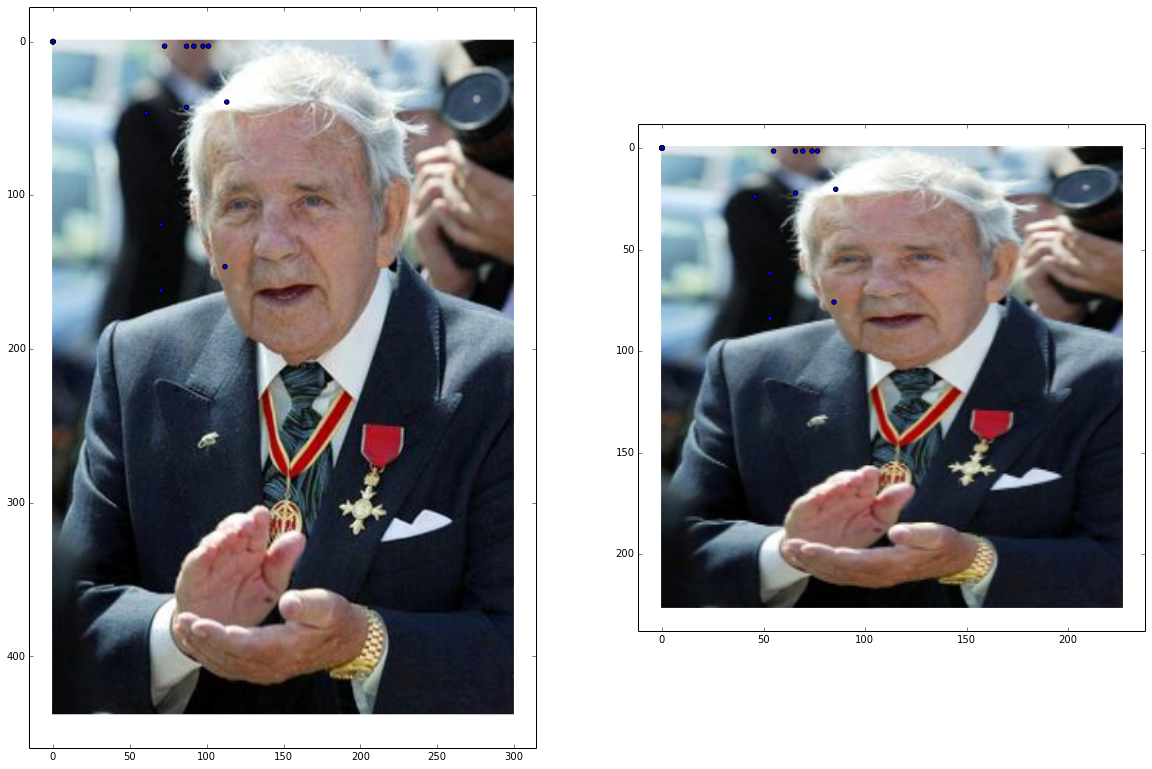

In [13]:
img = plt.imread('train/applauding/applauding_088.jpg')
orig_shape = img.shape
with tf.Session() as sess:
    resized_img = sess.run(tf.image.resize_images(img, [227, 227]))
    
ratio = (227.0 / orig_shape[1], 227.0 / orig_shape[0])

f, axarr = plt.subplots(1, 2, figsize=(20, 20))
axarr[0].imshow(img)
axarr[1].imshow(np.uint8(resized_img))
for people in js['people']:
    keypts = people['pose_keypoints']
    x = keypts[::3]
    y = keypts[1::3]
    c = keypts[2::3]
    tup = zip(x, y, c)
    if len(tup) > 0:
        x, y, c = zip(*tup)
        axarr[1].scatter(np.array(x) * ratio[0], np.array(y) * ratio[1])
        axarr[0].scatter(x, y)
    break

In [30]:
resized_img

array([[[ 225.        ,  144.        ,   39.        ],
        [ 224.35682678,  144.64317322,   39.64317322],
        [ 225.        ,  146.        ,   41.        ],
        ..., 
        [ 232.        ,  189.        ,  111.        ],
        [ 232.        ,  189.        ,  111.        ],
        [ 232.        ,  189.        ,  111.        ]],

       [[ 225.        ,  144.        ,   39.        ],
        [ 224.35682678,  144.64317322,   39.64317322],
        [ 225.        ,  146.        ,   41.        ],
        ..., 
        [ 232.        ,  189.        ,  111.        ],
        [ 232.        ,  189.        ,  111.        ],
        [ 232.        ,  189.        ,  111.        ]],

       [[ 225.        ,  144.        ,   39.        ],
        [ 224.35682678,  144.64317322,   39.64317322],
        [ 225.        ,  146.        ,   41.        ],
        ..., 
        [ 232.        ,  189.        ,  111.        ],
        [ 232.        ,  189.        ,  111.        ],
        [ 232.     

In [72]:
tup[0:]

[(343.456, 157.616, 0.851061),
 (314.108, 247.824, 0.646892),
 (238.021, 255.462, 0.500335),
 (331.51, 341.291, 0.535738),
 (405.442, 236.924, 0.533086),
 (396.752, 318.513, 0.617895),
 (317.358, 146.746, 0.883705),
 (343.515, 134.837, 0.935159),
 (272.796, 167.404, 0.615112)]